In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'archive/KDDTest+.txt')
df.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [3]:
df.to_csv(r'archive/KDDTest+.csv', index=False)

In [4]:
df_21 = pd.read_csv(r'archive/KDDTrain+.txt')

In [5]:
df_21.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
# Define column names based on KDD Cup 1999 dataset features
column_names = [
  'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
  'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
  'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
  'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
  'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
  'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
  'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
  'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
  'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'
]

# Rename columns for both dataframes
df.columns = column_names
df_21.columns = column_names

In [7]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


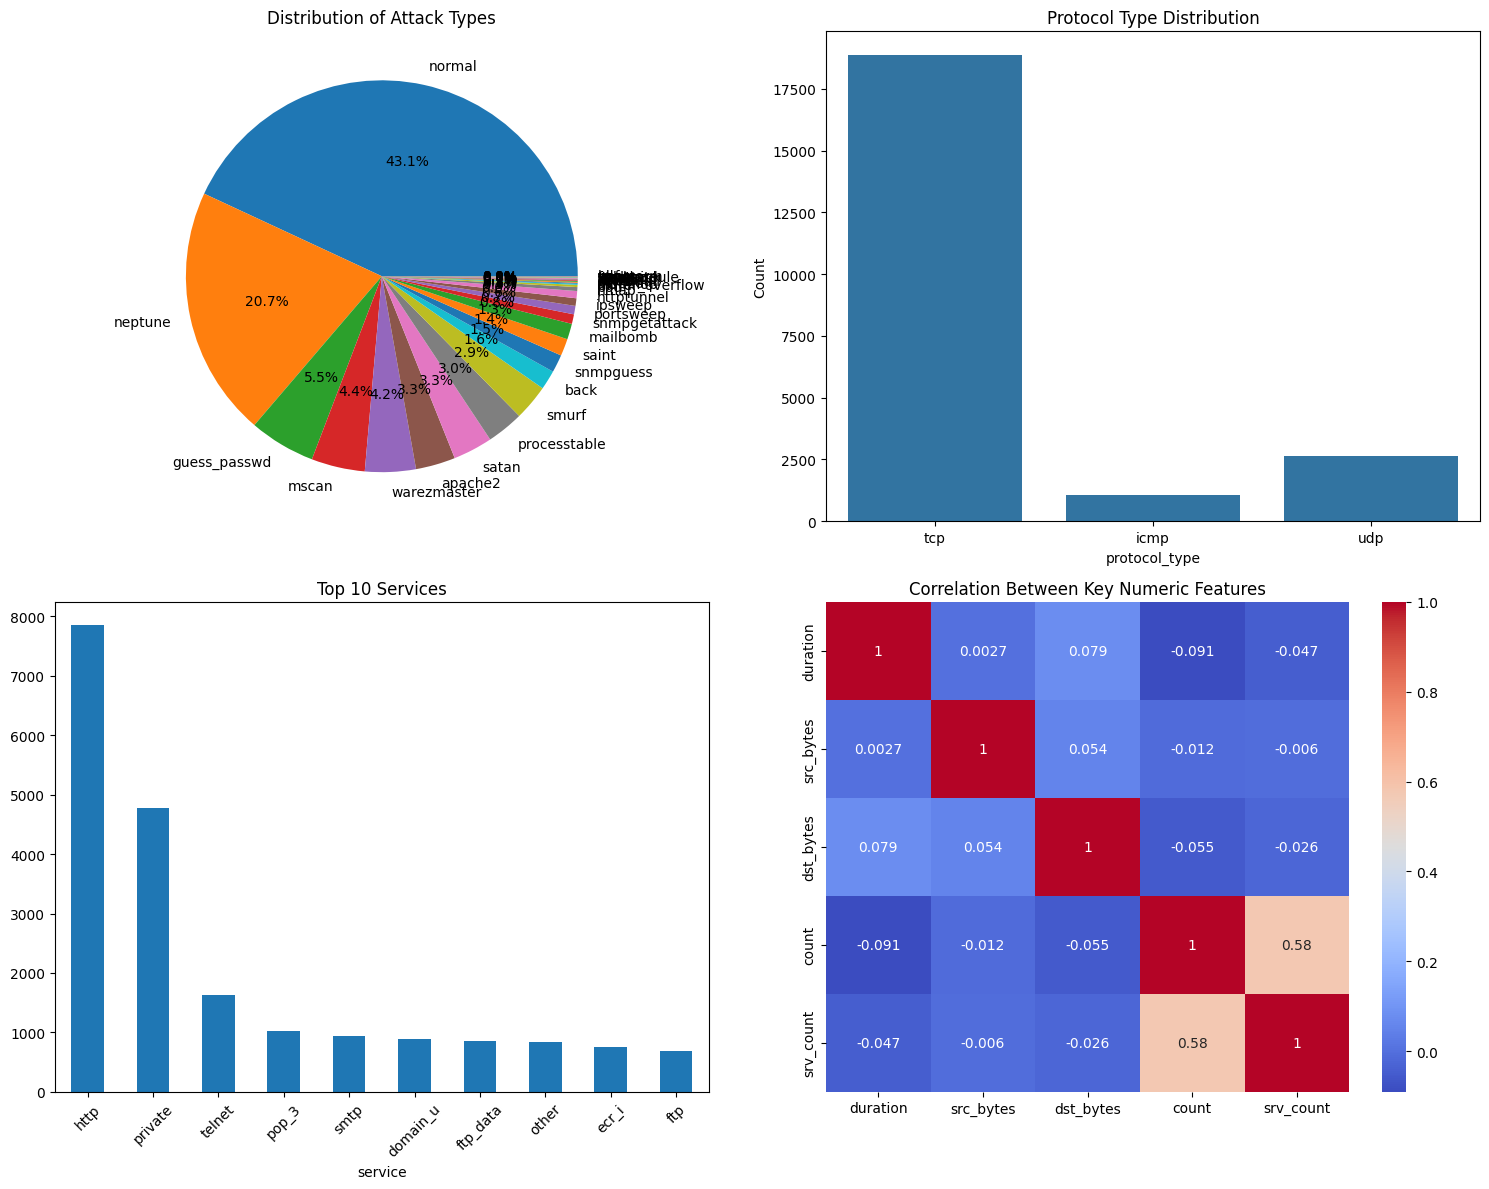

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set style for better visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of attack types
attack_counts = df['attack_type'].value_counts()
axes[0,0].pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Distribution of Attack Types')

# Protocol type distribution
sns.countplot(data=df, x='protocol_type', ax=axes[0,1])
axes[0,1].set_title('Protocol Type Distribution')
axes[0,1].set_ylabel('Count')

# Service type distribution (top 10)
service_counts = df['service'].value_counts()[:10]
service_counts.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Top 10 Services')
axes[1,0].tick_params(axis='x', rotation=45)

# Correlation between numeric features
numeric_cols = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Correlation Between Key Numeric Features')

plt.tight_layout()
plt.show()

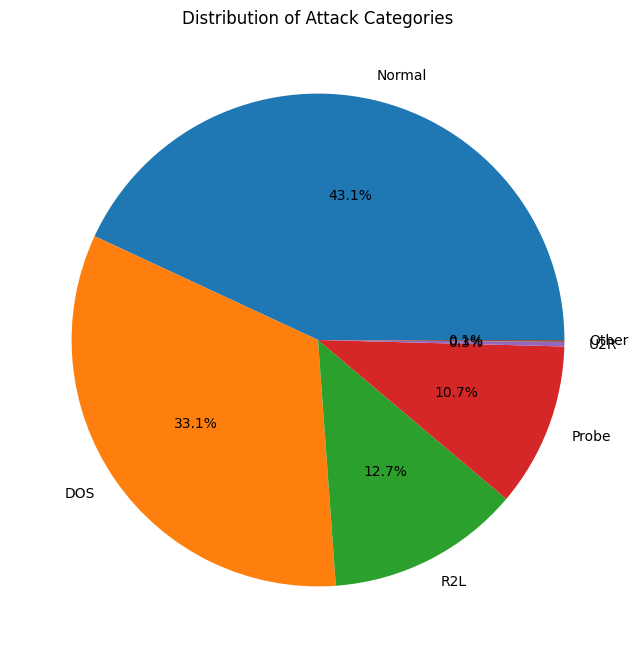

In [9]:
# Create attack categories
attack_categories = {
  'DOS': ['neptune', 'back', 'smurf', 'pod', 'teardrop', 'land', 'apache2', 'udpstorm', 'processtable', 'mailbomb'],
  'Probe': ['ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint'],
  'R2L': ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'xsnoop', 'httptunnel', 'snmpguess', 'snmpgetattack', 'sendmail'],
  'U2R': ['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps'],
  'Normal': ['normal']
}

# Function to map attack types to categories
def get_attack_category(attack):
  for category, attacks in attack_categories.items():
    if attack in attacks:
      return category
  return 'Other'

# Create category counts
df['attack_category'] = df['attack_type'].apply(get_attack_category)
category_counts = df['attack_category'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Attack Categories')
plt.show()

In [10]:
df.shape

(22543, 44)

In [12]:
df_train = pd.read_csv(r'archive/KDDTrain+.txt')

In [13]:
df_train.columns = column_names

In [15]:
df_train.shape

(125972, 43)